#  Webscraping avec python



<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04a_webscraping_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04a_webscraping_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04a_webscraping_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personnalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=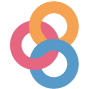)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04a_webscraping_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04a_webscraping_TP.ipynb)

Le [webscraping](https://fr.wikipedia.org/wiki/Web_scraping) désigne les techniques d'extraction du contenu des sites internet. C'est une pratique très utile pour toute personne souhaitant travailler sur des informations disponibles en ligne, mais n'existant pas forcément sous la forme d'un tableau *Excel*.

Ce TP vous présente comment créer et exécuter des robots afin de recupérer rapidement des informations utiles à vos projets actuels ou futurs.

Le *webscraping* a un certain nombre d'enjeux en termes de légalité, qui ne seront pas enseignés dans ce cours mais dans un cours de 3A à l'ENSAE. En particulier, la CNIL a publié en 2020 de nouvelles directives sur le *webscraping* reprécisant que toute donnée ne peut être réutilisée à l'insu de la personne à laquelle ces données appartiennent. 

Enfin, il est à noter que ce notebook est très fortement inspiré et réadapté à partir de [celui de Xavier Dupré](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/TD2A_Eco_Web_Scraping.html), l'ancien professeur de la matière.

## Un détour par le Web : comment fonctionne un site ?

Même si ce TP ne vise pas à faire un cours de web, il vous faut néanmoins certaines bases sur la manière dont un site internet fonctionne afin de comprendre comment sont structurées les informations sur une page.

Un site Web est un ensemble de pages codées en *HTML* qui permet de décrire à la fois le contenu et la forme d'une page *Web*.

Pour voir cela, ouvrez n'importe quelle page web et faites un clic-droit dessus. 
- Sous Chrome : Cliquez ensuite sur "Affichez le code source de la page" (Ctrl+U)
- Sous Edge : "Affichez la page source" (Ctrl+U)
- Sous Firefox : "Code source de la page"
- Sous Safari : voir comment faire ici https://fr.wikihow.com/voir-le-code-source

###  HTML 

### Les balises

Sur une page web, vous trouverez toujours à coup sûr des éléments comme ``<head>``, ``<title>``, etc. Il  s'agit des codes qui vous permettent de structurer le contenu d'une page *HTML* et qui s'appellent des **balises**. 
Citons, par exemple, les balises ``<p>``, ``<h1>``, ``<h2>``, ``<h3>``, ``<strong>`` ou ``<em>``.
Le symbole ``< >`` est une balise : il sert à indiquer le début d'une partie. Le symbole ``</ >`` indique la fin de cette partie. La plupart des balises vont par paires, avec une *balise ouvrante* et une *balise fermante* (par exemple ``<p>`` et ``</p>``).

#### Exemple : les balise des tableaux

$$
\begin{array}{rr} \hline
Balise  & \text{Description} \\ \hline
< table> & \text{Tableau} \\
< caption>& \text{Titre du tableau} \\
< tr> & \text{Ligne de tableau} \\
< th> & \text{Cellule d'en-tête}\\
< td> & \text{Cellule} \\
< thead> & \text{Section de l'en-tête du tableau} \\
< tbody> & \text{Section du corps du tableau} \\
< tfoot> & \text{Section du pied du tableau} \\
\end{array}
$$
**Application : un tableau en HTML**

Le code *HTML* du tableau suivant


In [ ]:
<table>
<caption> Le Titre de mon tableau </caption>

   <tr>
      <th>Prénom</th>
      <th>Nom</th>
      <th>Profession</th>
   </tr>
   <tr>
      <td>Mike </td>
      <td>Stuntman</td>
      <td>Cascadeur</td>
   </tr>
   <tr>
      <td>Mister</td>
      <td>Pink</td>
      <td>Gangster</td>
   </tr>
</table>

Donnera dans le navigateur

<table>
<caption> Le Titre de mon tableau </caption>

   <tr>
      <th>Prénom</th>
      <th>Nom</th>
      <th>Profession</th>
   </tr>
   <tr>
      <td>Mike </td>
      <td>Stuntman</td>
      <td>Cascadeur</td>
   </tr>
   <tr>
      <td>Mister</td>
      <td>Pink</td>
      <td>Gangster</td>
   </tr>
</table>

#### Parent et enfant

Dans le cadre du langage HTML, les termes de parent (*parent*) et enfant (*child*) servent à désigner des élements emboîtés les uns dans les autres. Dans la construction suivante, par exemple :


In [ ]:
< div> 
    < p>
       bla,bla
    < /p>
< /div>

Sur la page web, cela apparaitra de la manière suivante : 

<div> 
    <p>
       bla,bla
    </p>
</div>

On dira que l'élément ``<div>`` est le parent de l'élément ``<p>`` tandis que l'élément ``<p>`` est l'enfant de l'élément ``<div>``.

----------

Mais pourquoi apprendre ça pour "scraper", me direz-vous ?

Parce que, pour bien récupérer les informations d'un site internet, il faut pouvoir comprendre sa structure et donc son code HTML. Les fonctions python qui servent au scrapping sont principalement construites pour vous permettre de naviguer entre les balises.

## Scraper avec python

Nous allons essentiellement utiliser le package [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) pour ce cours, mais d'autres packages existent (Selenium, Scrapy...).

BeautifulSoup sera suffisant quand vous voudrez travailler sur des pages HTML statiques. Dès que les informations que vous recherchez sont générées via l'exécution de scripts [Javascript](https://fr.wikipedia.org/wiki/JavaScript), il vous faudra passer par des outils comme [Selenium](https://selenium-python.readthedocs.io/).

De même, si vous ne connaissez pas l'URL, il faudra passer par un framework comme [Scrapy](https://scrapy.org/), qui passe facilement d'une page à une autre ("crawl"). Scrapy est plus complexe à manipuler que BeautifulSoup : si vous voulez plus de détails, rendez-vous sur la page du [tutoriel Scrapy](https://doc.scrapy.org/en/latest/intro/tutorial.html).

### Utiliser BeautifulSoup

Les packages pour scraper des pages HTML : 
- [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) (``pip install bs4``)
- [urllib](https://docs.python.org/3/library/urllib.html#module-urllib)


In [ ]:
import urllib
import bs4
import pandas
#help(bs4)

#### 1ere page HTML

On va commencer doucement. Prenons une page wikipedia, par exemple celle de la Ligue 1 de football : [Championnat de France de football 2019-2020](https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020). On va souhaiter récupérer la liste des équipes, ainsi que les url des pages Wikipedia de ces équipes.


In [ ]:
# Etape 1 : se connecter à la page wikipedia et obtenir le code source

url_ligue_1 = "https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020"
    
from urllib import request

request_text = request.urlopen(url_ligue_1).read()
print(request_text[:1000])    

In [ ]:
type(request_text)

In [ ]:
# Etape 2 : utiliser le package BeautifulSoup
# qui "comprend" les balises contenues dans la chaine de caractères renvoyée par la fonction request

page = bs4.BeautifulSoup(request_text, "lxml")

#print(page)

Si on print l'objet, page créée avec BeautifulSoup, on voit que ce n'est plus une chaine de caractères mais bien une page HTML avec des balises. On peut à présent chercher des élements à l'intérieur de ces balises.

Par exemple, si on veut connaître le titre de la page, on utilise la méthode ``.find`` et on lui demande "title"



In [ ]:
print(page.find("title"))

La methode ``.find`` ne renvoie que la première occurence de l'élément. 
Cela correspond à l'encart "Généralités" de la page. 

Pour vous en assurer vous pouvez :
- copier le bout de code source obtenu, 
- le coller  dans une cellule de votre notebook
- et passer la cellule en "Markdown"


In [ ]:
print(page.find("table"))

La cellule avec le copier-coller du code source donne : 

<table><caption style="background:#99cc99;color:#000000;">Généralités</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Sport</th>
<td>
<a href="/wiki/Football" title="Football">Football</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Organisateur(s)</th>
<td>
<a href="/wiki/Ligue_de_football_professionnel" title="Ligue de football professionnel">LFP</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Édition</th>
<td>
<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Lieu(x)</th>
<td>
<span class="datasortkey" data-sort-value="France"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a> </span><a href="/wiki/France" title="France">France</a></span> et <br/><span class="datasortkey" data-sort-value="Monaco"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Monaco.svg" title="Drapeau de Monaco"><img alt="Drapeau de Monaco" class="noviewer thumbborder" data-file-height="800" data-file-width="1000" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/20px-Flag_of_Monaco.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/30px-Flag_of_Monaco.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/40px-Flag_of_Monaco.svg.png 2x" width="20"/></a> </span><a href="/wiki/Monaco" title="Monaco">Monaco</a></span></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Date</th>
<td>
Du <time class="nowrap date-lien" data-sort-value="2019-08-09" datetime="2019-08-09"><a href="/wiki/9_ao%C3%BBt_en_sport" title="9 août en sport">9</a> <a class="mw-redirect" href="/wiki/Ao%C3%BBt_2019_en_sport" title="Août 2019 en sport">août</a> <a href="/wiki/2019_en_football" title="2019 en football">2019</a></time><br/>au <time class="nowrap date-lien" data-sort-value="2020-03-08" datetime="2020-03-08"><a href="/wiki/8_mars_en_sport" title="8 mars en sport">8 mars</a> <a href="/wiki/2020_en_football" title="2020 en football">2020</a></time> <small>(arrêt définitif)</small></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Participants</th>
<td>
20 équipes</td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Matchs joués</th>
<td>
279</td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Site web officiel</th>
<td>
<a class="external text" href="https://www.ligue1.fr/" rel="nofollow">Site officiel</a></td>
</tr></tbody></table>

---------------
Pour trouver toutes les occurences, on utilise ``.findAll()``.


In [ ]:
print("Il y a", len(page.findAll("table")), "éléments dans la page qui sont des <table>")

### Exercice guidé : obtenir la liste des équipes de Ligue 1

Dans le premier paragraphe de la page "Participants", on a le tableau avec les résultats de l'année. 

Le but est de récupérer les informations contenues dans ce tableau. 


#### 1) Trouver le tableau


In [ ]:
# on identifie le tableau en question : c'est le premier qui a cette classe "wikitable sortable"
tableau_participants = page.find('table', {'class' : 'wikitable sortable'})
print(tableau_participants)

#### 2) Récupérer chaque ligne du table


In [ ]:
table_body = tableau_participants.find('tbody')

# on recherche toutes les lignes du tableau avec la balise "tr"
rows = table_body.find_all('tr')

# on obtient une liste où chaque élément est une des lignes du tableau

# par exemple la première ligne va correspondre aux entêtes de colonne
print(rows[0])

In [ ]:
# par exemple la seconde ligne va correspondre à la ligne du premier club présent dans le tableau

print(rows[1])

#### 3)  Nettoyer les sorties en ne gardant que le texte sur une ligne

On va utiliser l'attribut "text" afin de se débarasser de toute la couche de HTML qu'on obtient à l'étape 2.

Un exemple sur la ligne du premier club :
- on commence par prendre toutes les cellules de cette ligne, avec la balise "td".
- on fait ensuite une boucle sur chacune des cellules et on ne garde que le texte de la cellule avec l'attribut "text".
- enfin, on applique la méthode strip() pour que le texte soit bien mis en forme (sans espace inutile etc).



In [ ]:
cols = rows[1].find_all('td')
print(cols[0])
print(cols[0].text.strip())

In [ ]:
for ele in cols : 
    print(ele.text.strip())

#### 4) Généraliser sur toutes les lignes


In [ ]:
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    print(cols)

On a bien réussi à avoir les informations contenues dans le tableau des participants du championnat.
Mais la première ligne est étrange : c'est une liste vide ... 

Il s'agit des en-têtes : elles sont reconnues par la balise "th" et non "td". 

On va mettre tout le contenu dans un dictionnaire, pour le transformer ensuite en dataframe pandas : 


In [ ]:
dico_participants = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_participants[cols[0]] = cols[1:]
dico_participants

In [ ]:
data_participants = pandas.DataFrame.from_dict(dico_participants,orient='index')
data_participants.head()

#### 5) Récupérer les entêtes du tableau


In [ ]:
for row in rows:
    cols = row.find_all('th')
    print(cols)
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_participants = cols

In [ ]:
columns_participants

#### 6) Finalisation du tableau 


In [ ]:
data_participants.columns = columns_participants[1:]

In [ ]:
data_participants

Essayez de comprendre pas à pas ce qui est fait dans les étapes qui suivent (la récupération d'informations supplémentaires en naviguant dans les pages des différents clubs). 


In [ ]:
import urllib
import pandas as pd
import bs4 

division=[]
equipe=[]
stade=[]
latitude_stade=[]        
longitude_stade=[]     


url_list=["http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020", "http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_de_Ligue_2_2019-2020"]

for url_ligue in url_list :
       
    print(url_ligue)
    sock = urllib.request.urlopen(url_ligue).read() 
    page=bs4.BeautifulSoup(sock)

# Rechercher les liens des équipes dans la liste disponible sur wikipedia 

    for team in page.findAll('span' , {'class' : 'toponyme'}) :  
        
        # Indiquer si c'est de la ligue 1 ou de la ligue 2
        
        if url_ligue==url_list[0] :
            division.append("L1")
        else :
            division.append("L2")

       # Trouver le nom et le lien de l'équipe
            
        if team.find('a')!=None :
            team_url=team.find('a').get('href')
            name_team=team.find('a').get('title')
            equipe.append(name_team)
            url_get_info = "http://fr.wikipedia.org"+team_url
            print(url_get_info)
 
       # aller sur la page de l'équipe
           
            search = urllib.request.urlopen(url_get_info).read()
            search_team=bs4.BeautifulSoup(search)

       # trouver le stade             
            compteur = 0
            for stadium in search_team.findAll('tr'):
                for x in stadium.findAll('th' , {'scope' : 'row'} ) :
                    if x.contents[0].string=="Stade" and compteur == 0:
                        compteur = 1
                        # trouver le lien du stade et son nom
                        url_stade=stadium.findAll('a')[1].get('href')
                        name_stadium=stadium.findAll('a')[1].get('title')
                        stade.append(name_stadium)
                        url_get_stade = "http://fr.wikipedia.org"+url_stade
                        print(url_get_stade)
                        
                        # Aller sur la page du stade et trouver ses coodronnées géographiques
                        
                        search_stade = urllib.request.urlopen(url_get_stade).read()
                        soup_stade=bs4.BeautifulSoup(search_stade) 
                        kartographer = soup_stade.find('a',{'class': "mw-kartographer-maplink"})
                        if kartographer == None :
                          latitude_stade.append(None)
                          longitude_stade.append(None) 
                        else :
                            for coordinates in kartographer :
                                print(coordinates)
                                liste =   coordinates.split(",")             
                                latitude_stade.append(liste[0])
                                longitude_stade.append(liste[1])
                            

dict = {'division' : division , 'equipe': equipe, 'stade': stade, 'latitude': latitude_stade, 'longitude' : longitude_stade}
data = pd.DataFrame(dict)

In [ ]:
len(division), len(equipe), len(stade), len(latitude_stade), len(longitude_stade)

In [ ]:
data

In [ ]:
# -*- coding: utf-8 -*-
import re

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'S' or direction == 'O':
        dd *= -1
    return dd;

def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])
    lng = dms2dd(parts[4], parts[5], parts[6], parts[7])
    return (lat, lng)

dd = parse_dms("47°57'32' N 0°13'20' E")

print(dd)

## Exercice 1 : Les pokémons (version non guidée)

Pour cet exercice, nous vous demandons d'obtenir 

### Etape 1 
les informations personnelles des ``893`` pokemons sur le site internet [pokemondb.net](http://pokemondb.net/pokedex/national). Les informations que nous aimerions obtenir au final dans un DataFrame  sont celles contenues dans 4 tableaux :

- Pokédex data
- Training
- Breeding
- Base stats

Pour exemple : [Nincada](http://pokemondb.net/pokedex/nincada).

<div class="grid-col span-md-6 span-lg-4">
<h2>Pokédex data</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>National №</th>
<td><strong>290</strong></td>
</tr>
<tr>
<th>Type</th>
<td>
<a class="type-icon type-bug" href="/type/bug">Bug</a> <a class="type-icon type-ground" href="/type/ground">Ground</a> </td>
</tr>
<tr>
<th>Species</th>
<td>Trainee Pokémon</td>
</tr>
<tr>
<th>Height</th>
<td>0.5&nbsp;m (1′08″)</td>
</tr>
<tr>
<th>Weight</th>
<td>5.5&nbsp;kg (12.1&nbsp;lbs)</td>
</tr>
<tr>
<th>Abilities</th>
<td><span class="text-muted">1. <a href="/ability/compound-eyes" title="The Pokémon's accuracy is boosted.">Compound Eyes</a></span><br><small class="text-muted"><a href="/ability/run-away" title="Enables a sure getaway from wild Pokémon.">Run Away</a> (hidden ability)</small><br></td>
</tr>
<tr>
<th>Local №</th>
<td>042 <small class="text-muted">(Ruby/Sapphire/Emerald)</small><br>111 <small class="text-muted">(X/Y — Central Kalos)</small><br>043 <small class="text-muted">(Omega Ruby/Alpha Sapphire)</small><br>104 <small class="text-muted">(Sword/Shield)</small><br></td>
</tr>
</tbody>
</table>
</div>


<div class="grid-col span-md-12 span-lg-4">
<div class="grid-row">
<div class="grid-col span-md-6 span-lg-12">
<h2>Training</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>EV yield</th>
<td class="text">
1 Defense </td>
</tr>
<tr>
<th>Catch rate</th>
<td>255 <small class="text-muted">(33.3% with PokéBall, full HP)</small></td>
</tr>
<tr>
<th>Base <a href="/glossary#def-friendship">Friendship</a></th>
<td>70 <small class="text-muted">(normal)</small></td>
</tr>
<tr>
<th>Base Exp.</th>
<td>53</td>
</tr>
<tr>
<th>Growth Rate</th>
<td>Erratic</td>
</tr>
</tbody>
</table>
</div>
<div class="grid-col span-md-6 span-lg-12">
<h2>Breeding</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>Egg Groups</th>
<td>
<a href="/egg-group/bug">Bug</a> </td>
</tr>
<tr>
<th>Gender</th>
<td><span class="text-blue">50% male</span>, <span class="text-pink">50% female</span></td> </tr>
<tr>
<th><a href="/glossary#def-eggcycle">Egg cycles</a></th>
<td>15 <small class="text-muted">(3,599–3,855 steps)</small>
</td>
</tr>
</tbody>
</table>
</div>
</div>
</div>

<div class="grid-col span-md-12 span-lg-8">
<div id="dex-stats"></div>
<h2>Base stats</h2>
<div class="resp-scroll">
<table class="vitals-table">
<tbody>
<tr>
<th>HP</th>
<td class="cell-num">31</td>
<td class="cell-barchart">
<div style="width:17.22%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">172</td>
<td class="cell-num">266</td>
</tr>
<tr>
<th>Attack</th>
<td class="cell-num">45</td>
<td class="cell-barchart">
<div style="width:25.00%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">85</td>
<td class="cell-num">207</td>
</tr>
<tr>
<th>Defense</th>
<td class="cell-num">90</td>
<td class="cell-barchart">
<div style="width:50.00%;" class="barchart-bar barchart-rank-4 "></div>
</td>
<td class="cell-num">166</td>
<td class="cell-num">306</td>
</tr>
<tr>
<th>Sp. Atk</th>
<td class="cell-num">30</td>
<td class="cell-barchart">
<div style="width:16.67%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">58</td>
<td class="cell-num">174</td>
</tr>
<tr>
<th>Sp. Def</th>
<td class="cell-num">30</td>
<td class="cell-barchart">
<div style="width:16.67%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">58</td>
<td class="cell-num">174</td>
</tr>
<tr>
<th>Speed</th>
<td class="cell-num">40</td>
<td class="cell-barchart">
<div style="width:22.22%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">76</td>
<td class="cell-num">196</td>
</tr>
</tbody>
<tfoot>
<tr>
<th>Total</th>
<td class="cell-total"><b>266</b></td>
<th class="cell-barchart"></th>
<th>Min</th>
<th>Max</th>
</tr>
</tfoot>
</table>
</div>
</div>

### Etape 2

Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier  

(indice : utilisez les modules request et [shutil](https://docs.python.org/3/library/shutil.html))

_pour cette question, il faut que vous cherchiez de vous même certains éléments, tout n'est pas présent dans le TD_.

## Exercice 1 : Les pokémons

**Exercice 1 : Les pokémons (version guidée)**

Pour cet exercice, nous vous demandons d'obtenir différentes informations sur les pokémons à partir du site internet [pokemondb.net](http://pokemondb.net/pokedex/national). 

**Etape 1**

Nous souhaitons tout d'abord obtenir les informations personnelles des ``893`` pokemons sur [pokemondb.net](http://pokemondb.net/pokedex/national). Les informations que nous aimerions obtenir au final pour les pokemons sont celles contenues dans 4 tableaux :

- Pokédex data
- Training
- Breeding
- Base stats

Par exemple : [Nincada](http://pokemondb.net/pokedex/nincada).

<div class="grid-col span-md-6 span-lg-4">
<h2>Pokédex data</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>National №</th>
<td><strong>290</strong></td>
</tr>
<tr>
<th>Type</th>
<td>
<a class="type-icon type-bug" href="/type/bug">Bug</a> <a class="type-icon type-ground" href="/type/ground">Ground</a> </td>
</tr>
<tr>
<th>Species</th>
<td>Trainee Pokémon</td>
</tr>
<tr>
<th>Height</th>
<td>0.5&nbsp;m (1′08″)</td>
</tr>
<tr>
<th>Weight</th>
<td>5.5&nbsp;kg (12.1&nbsp;lbs)</td>
</tr>
<tr>
<th>Abilities</th>
<td><span class="text-muted">1. <a href="/ability/compound-eyes" title="The Pokémon's accuracy is boosted.">Compound Eyes</a></span><br><small class="text-muted"><a href="/ability/run-away" title="Enables a sure getaway from wild Pokémon.">Run Away</a> (hidden ability)</small><br></td>
</tr>
<tr>
<th>Local №</th>
<td>042 <small class="text-muted">(Ruby/Sapphire/Emerald)</small><br>111 <small class="text-muted">(X/Y — Central Kalos)</small><br>043 <small class="text-muted">(Omega Ruby/Alpha Sapphire)</small><br>104 <small class="text-muted">(Sword/Shield)</small><br></td>
</tr>
</tbody>
</table>
</div>

<div class="grid-col span-md-12 span-lg-4">
<div class="grid-row">
<div class="grid-col span-md-6 span-lg-12">
<h2>Training</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>EV yield</th>
<td class="text">
1 Defense </td>
</tr>
<tr>
<th>Catch rate</th>
<td>255 <small class="text-muted">(33.3% with PokéBall, full HP)</small></td>
</tr>
<tr>
<th>Base <a href="/glossary#def-friendship">Friendship</a></th>
<td>70 <small class="text-muted">(normal)</small></td>
</tr>
<tr>
<th>Base Exp.</th>
<td>53</td>
</tr>
<tr>
<th>Growth Rate</th>
<td>Erratic</td>
</tr>
</tbody>
</table>
</div>
<div class="grid-col span-md-6 span-lg-12">
<h2>Breeding</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>Egg Groups</th>
<td>
<a href="/egg-group/bug">Bug</a> </td>
</tr>
<tr>
<th>Gender</th>
<td><span class="text-blue">50% male</span>, <span class="text-pink">50% female</span></td> </tr>
<tr>
<th><a href="/glossary#def-eggcycle">Egg cycles</a></th>
<td>15 <small class="text-muted">(3,599–3,855 steps)</small>
</td>
</tr>
</tbody>
</table>
</div>
</div>
</div>

<div class="grid-col span-md-12 span-lg-8">
<div id="dex-stats"></div>
<h2>Base stats</h2>
<div class="resp-scroll">
<table class="vitals-table">
<tbody>
<tr>
<th>HP</th>
<td class="cell-num">31</td>
<td class="cell-barchart">
<div style="width:17.22%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">172</td>
<td class="cell-num">266</td>
</tr>
<tr>
<th>Attack</th>
<td class="cell-num">45</td>
<td class="cell-barchart">
<div style="width:25.00%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">85</td>
<td class="cell-num">207</td>
</tr>
<tr>
<th>Defense</th>
<td class="cell-num">90</td>
<td class="cell-barchart">
<div style="width:50.00%;" class="barchart-bar barchart-rank-4 "></div>
</td>
<td class="cell-num">166</td>
<td class="cell-num">306</td>
</tr>
<tr>
<th>Sp. Atk</th>
<td class="cell-num">30</td>
<td class="cell-barchart">
<div style="width:16.67%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">58</td>
<td class="cell-num">174</td>
</tr>
<tr>
<th>Sp. Def</th>
<td class="cell-num">30</td>
<td class="cell-barchart">
<div style="width:16.67%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">58</td>
<td class="cell-num">174</td>
</tr>
<tr>
<th>Speed</th>
<td class="cell-num">40</td>
<td class="cell-barchart">
<div style="width:22.22%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">76</td>
<td class="cell-num">196</td>
</tr>
</tbody>
<tfoot>
<tr>
<th>Total</th>
<td class="cell-total"><b>266</b></td>
<th class="cell-barchart"></th>
<th>Min</th>
<th>Max</th>
</tr>
</tfoot>
</table>
</div>
</div>

Pour cela, le code devra être divisé en plusieurs étapes : 

1. Trouvez la page principale du site et la transformez en un objet intelligible pour votre code. Les fonctions suivantes vous seront utiles :
- urllib.request.Request
- urllib.request.urlopen
- bs4.BeautifulSoup

Note : pour ce site, il faudra ajouter un paramètre supplémentaire à la fonction Request 

``urllib.request.Request( www.sitequinousintéresse.com ,headers={'User-Agent': 'Mozilla/5.0'})`` 


2. Créez une fonction qui permet de récupérer la page d'un pokémon à partir de son nom.


3. A partir de la page de ``bulbasaur``, obtenez les 4 tableaux qui nous intéressent :
- on va chercher l'élément suivant : ('table', { 'class' : "vitals-table"}
- puis stocker ses éléments dans un dictionnaire


4. Récupérez par ailleurs la liste de noms des pokémons qui nous permettra de faire une boucle par la suite. Combien trouvez-vous de pokémons ? 


5. Ecrire une fonction qui récupère l'ensemble des informations sur les dix premiers pokémons de la liste et les intègre dans un data.frame


**Etape 2**

Nous aimerions que vous récupériez également les images des 5 premiers pokémons et que vous les enregistriez dans un dossier  

(indice : utilisez les modules request et [shutil](https://docs.python.org/3/library/shutil.html))

_pour cette question, il faut que vous cherchiez de vous même certains éléments, tout n'est pas présent dans le TD_.






**Exercice 2 [BONUS] Les ministres sur wikipédia**

Scraper la liste des ministres français depuis wikipedia. Faire une graphique qui représente la distribution de leur âge.


## Application : Aller sur internet avec Selenium

Jusqu'à présent, nous avons raisonné comme si nous connaissions toujours l'url qui nous intéresse. De plus, les pages que nous visitons sont "statiques", elles ne dépendent pas d'une action ou d'une recherche de l'internaute. 

Nous allons voir à présent comment nous en sortir pour remplir des champs sur un site web et récupérer ce qui nous intéresse. 

L'avantage du package [Selenium](https://pypi.python.org/pypi/selenium) est d'obtenir des informations du site qui ne sont pas dans le code html mais qui apparaissent uniquement à la suite de l'exécution de script javascript en arrière plan. 

Selenium se comporte comme un utilisateur lambda sur internet : il clique sur des liens, il remplit des formulaires etc. Dans cet exemple, nous allons essayer de aller sur le site de [Bing Actualités](https://www.bing.com/news) et entrer dans la barre de recherche un sujet donné (Trump). 

La version de [chromedriver](https://sites.google.com/a/chromium.org/chromedriver/) doit être ``>= 2.36`` et dépend de la version de Chrome que vous avez sur votre poste.


In [ ]:
# Si selenium n'est pas installé.
# #!pip install selenium

In [ ]:
# Sur votre poste  
# télécharger le chrome driver https://chromedriver.storage.googleapis.com/index.html?path=85.0.4183.83/

# Sur google colab 
# https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [ ]:
import selenium
path_to_web_driver = "chromedriver"

On va sur le site de Bing Actualités, et on lui indique le mot clé que nous souhaitons chercher. 

Dans cet exemple, on va voir que l'ordinateur va ouvrir une nouvelle fenêtre.


In [ ]:
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
#chrome_options.add_argument('--verbose') 
#chrome_options.add_argument('--disable-dev-shm-usage')

browser = webdriver.Chrome(executable_path=path_to_web_driver,
                           options=chrome_options)

browser.get('https://www.bing.com/news')

# on cherche l'endroit où on peut remplir un formulaire
# en utilisant les outils du navigateur > inspecter les éléments de la page
# on voit que la barre de recherche est un élement du code appelé 'q' comme query
# on lui demande de chercher cet élément

search = browser.find_element_by_name('q')
print(search)
print([search.text, search.tag_name, search.id])

# on envoie à cet endroit le mot qu'on aurait tapé dans la barre de recherche
search.send_keys("Trump")

search_button = browser.find_element_by_xpath("//input[@id='sb_form_go']")

#search_button = browser.find_element_by_id('search_button_homepage')
 
search_button.click()

# on appuie sur le bouton "Entrée" Return en anglais
#search.send_keys(Keys.RETURN)

In [ ]:
png = browser.get_screenshot_as_png()

In [ ]:
from IPython.display import Image
Image(png, width='500')

On extrait les résultats.


In [ ]:
from selenium.common.exceptions import StaleElementReferenceException
links = browser.find_elements_by_xpath("//div/a[@class='title'][@href]")

results = []
for link in links:
    try:
        url = link.get_attribute('href')
    except StaleElementReferenceException as e:
        print("Issue with '{0}' and '{1}'".format(url, link))
        print("It might be due to slow javascript which produces the HTML page.")
    results.append(url)

len(results)

In [ ]:
# on a une pause de 10 secondes pour aller voir ce qui se passe sur la page internet
# on demande de quitter le navigateur quand tout est fini
browser.quit()

In [ ]:
print(results)

### Utiliser selenium pour jouer à 2048

Dans cet exemple, on utilise le module pour que python appuie lui même sur les touches du clavier afin de jouer à 2048.

Note : ce bout de code ne donne pas une solution à 2048, il permet juste de voir ce qu'on peut faire avec selenium


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# on ouvre la page internet du jeu 2048

browser = webdriver.Chrome(executable_path=path_to_web_driver,
                           options=chrome_options)
browser.get('https://play2048.co//')

# Ce qu'on va faire : une boucle qui répète inlassablement la même chose : haut / droite / bas / gauche

# on commence par cliquer sur la page pour que les touches sachent 
browser.find_element_by_class_name('grid-container').click()
grid = browser.find_element_by_tag_name('body')

# pour savoir quels coups faire à quel moment, on crée un dictionnaire
direction = {0: Keys.UP, 1: Keys.RIGHT, 2: Keys.DOWN, 3: Keys.LEFT}
count = 0

while True:
    try: # on vérifie que le bouton "Try again" n'est pas là - sinon ça veut dire que le jeu est fini
        retryButton = browser.find_element_by_link_text('Try again')
        scoreElem = browser.find_element_by_class_name('score-container')
        break
    except:
        #Do nothing.  Game is not over yet
        pass
    # on continue le jeu - on appuie sur la touche suivante pour le coup d'après
    count += 1
    grid.send_keys(direction[count % 4]) 
    time.sleep(0.1)

print('Score final : {} en {} coups'.format(scoreElem.text, count))    
browser.quit()